## xAI

In [51]:
from src.models.dr_model import DRLightning, DeepCNN
import torch

net = DeepCNN()
model = DRLightning.load_from_checkpoint("./trained_models/deepCNN/checkpoints/best-epoch=74-val_acc=0.786.ckpt", model=net)
model.eval()

/home/jrosa/AGH_FILES/PAOM_retinapatia/.venv/lib/python3.12/site-packages/pytorch_lightning/utilities/parsing.py:210: Attribute 'model' is an instance of `nn.Module` and is already saved during checkpointing. It is recommended to ignore them using `self.save_hyperparameters(ignore=['model'])`.


DRLightning(
  (train_f1): MulticlassF1Score()
  (val_f1): MulticlassF1Score()
  (test_f1): MulticlassF1Score()
  (model): DeepCNN(
    (features): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU()
      (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (9): ReLU()
      (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (12): ReLU()
      (1

In [52]:
import torch
from src.utils.xAI import ModelInspector
from src.datamodules.dr_module import RDDatamodule

model.eval()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

datamodule = RDDatamodule()
datamodule.setup(stage="test")

test_loader = datamodule.test_dataloader()

target_layer = model.model.features[-4]

x, y = next(iter(test_loader))
x = x[:1].to(device)
target_class = y[0].item()

inspector = ModelInspector(
    model=model,
    target_layer=target_layer,
    device=device,
)

saliency = inspector.explain(
    x,
    method="saliency",
    target=target_class,
)

gradcampp = inspector.explain(
    x,
    method="gradcam",
    target=target_class,
)



TRAIN class distribution:
  Class 0: 1263
  Class 1: 259
  Class 2: 699
  Class 3: 135
  Class 4: 207

VAL class distribution:
  Class 0: 361
  Class 1: 74
  Class 2: 200
  Class 3: 39
  Class 4: 58

TEST class distribution:
  Class 0: 181
  Class 1: 37
  Class 2: 100
  Class 3: 19
  Class 4: 30

Total samples
 Train: 2563 | Val: 732 | Test: 367


/home/jrosa/AGH_FILES/PAOM_retinapatia/.venv/lib/python3.12/site-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


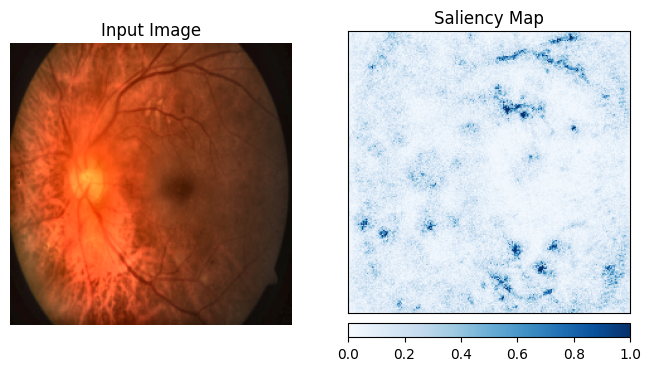

<Figure size 640x480 with 0 Axes>

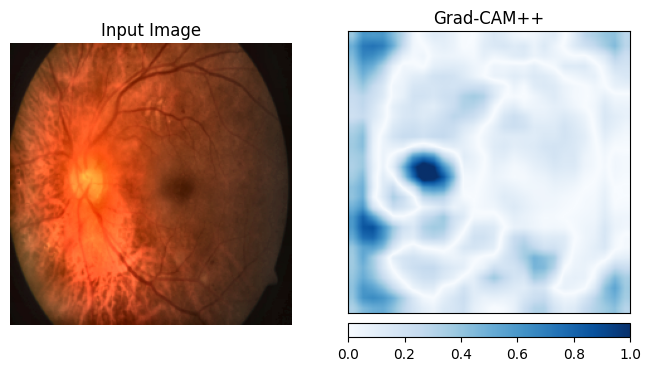

<Figure size 640x480 with 0 Axes>

In [ ]:
inspector.visualize_side_by_side(saliency[0], x[0], title=f"{net.__class__.__name__}: Saliency Map")
inspector.visualize_side_by_side(gradcampp[0], x[0], title=f"{net.__class__.__name__}: Grad-CAM++")


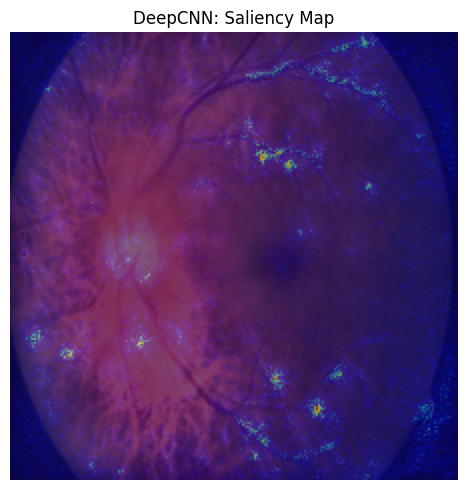

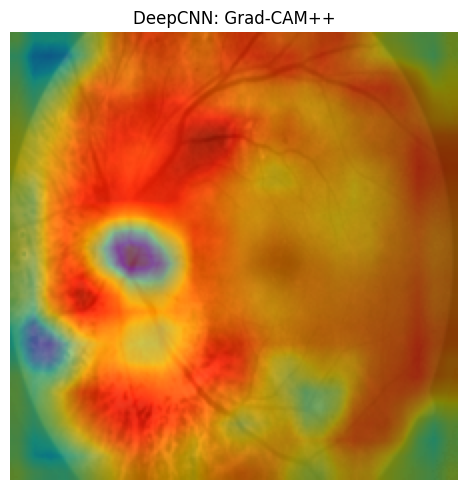

In [54]:
inspector.visualize_overlay(saliency[0], x[0], title=f"{net.__class__.__name__}: Saliency Map")
inspector.visualize_overlay(gradcampp[0], x[0], title=f"{net.__class__.__name__}: Grad-CAM++")